In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
X = np.array(pd.read_csv('/content/EnergyEfficiency.csv', header = None))

In [6]:
X.shape

(620, 8)

In [0]:
y = np.array(pd.read_csv('/content/Response.csv', header = None))

In [9]:
y.shape

(620, 1)

In [0]:
## Standardize X
mean_X = np.mean(X, axis = 0)

In [0]:
std_X = np.std(X, axis = 0)

In [0]:
X_norm = (X- mean_X)/std_X

In [17]:
##Test
col_X = X_norm[:, 0]
print('Mean of Column 0 of standardized X:', np.mean(col_X))
print()
print('Standard deviation of column 1 of standardized X:', np.std(col_X))

Mean of Column 0 of standardized X: -2.693186175864896e-16

Standard deviation of column 1 of standardized X: 1.0


In [0]:
#Standardized y
mean_y = np.mean(y)
std_y= np.std(y)
y_norm = (y-mean_y)/std_y

In [22]:
print(' Mean of Response y_norm:',y_norm.mean())

 Mean of Response y_norm: 1.532824046901829e-16


In [25]:
X_norm.shape

(620, 8)

In [0]:
##Initializing a, w
a = np.random.uniform(low =-1, high =1 , size =(8,1))
w = np.random.uniform(low =-1, high =1 , size =(8,1))
err = []
rho = 1
alpha = 0.5

In [0]:
for i in range(0,50):
  ##updating b
  first_term = np.linalg.inv((np.dot(X_norm.T, X_norm)+ rho * np.identity(8)))
  second_term = np.dot(X_norm.T, y_norm) + rho * (a -w)
  b = np.dot(first_term, second_term)

  # updating a
  u,s,v = np.linalg.svd((b+w), full_matrices=False)
  if s > alpha/rho:
    s_t = s - alpha/rho
  elif s < -alpha/rho:
    s_t =  s + alpha/rho
  else:
    s_t = 0

  a = np.dot(u*s_t, v)

  #updating w
  w = w + b -a

  #calculating error
  error = np.linalg.norm((y_norm - np.dot(X_norm, b)))

  err.append(error)





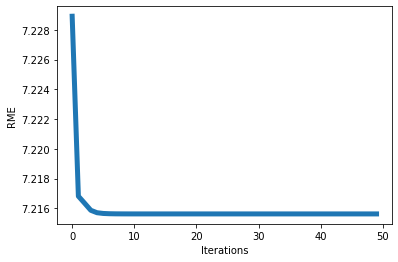

In [85]:
plt.plot(err, linewidth = 5)
plt.xlabel('Iterations')
plt.ylabel('RME')
plt.show()

In [87]:
## Coefficients
print("Coefficients of each parameters:", b)

Coefficients of each parameters: [[-0.6535163 ]
 [-0.38295155]
 [ 0.09454911]
 [-0.42115535]
 [ 0.66215271]
 [-0.00840807]
 [ 0.26832228]
 [ 0.03728797]]
